In [1]:
# Importação da biblioteca (pandas)
import pandas as pd

# Leitura do dataset Airbnb Listings
# - encoding='ISO-8859-1' para evitar problemas com caracteres especiais
# - low_memory=False para garantir melhor inferência de tipos
# - parse_dates=['host_since'] para converter automaticamente a coluna em datetime
listings = pd.read_csv(
    'Listings.csv',
    encoding='ISO-8859-1',
    low_memory=False,
    parse_dates=['host_since']
)

In [17]:
# Visualização inicial dos dados
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [18]:
#Listando as informações
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [19]:
# Garantindo que a coluna 'host_since' está no formato datetime
listings['host_since'] = pd.to_datetime(listings['host_since'], errors='coerce')

# Verificando a estrutura do dataset 
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [20]:
# Filtrando apenas os registros da cidade de Paris
# e selecionando colunas relevantes para análise
paris_listings = (
    listings
        .query("city == 'Paris'")
        .loc[:, [
            'host_since',
            'neighbourhood',
            'city',
            'accommodates',
            'price'
        ]]
)

# Verificando estrutura do novo DataFrame
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [21]:
# Analisando valores ausentes (quantidade e percentual)
missing_values = paris_listings.isna().sum()

missing_percentage = (missing_values / len(paris_listings)) * 100

pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage.round(2)
})


,Missing Values,Percentage (%)
host_since,33,0.05
neighbourhood,0,0.00
city,0,0.00
accommodates,0,0.00
price,0,0.00


In [22]:
# Estatísticas descritivas incluindo variáveis categóricas
paris_listings.describe()


,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [23]:
#Preparando para a Visualização:

In [24]:
# Calculando o preço médio por bairro 
paris_listings_neighbourhood = (
    paris_listings
        .groupby('neighbourhood')
        .agg({'price': 'mean'})
        .sort_values('price')  # Ordenando do menor para o maior preço médio
)

# Visualizando os bairros com menor preço médio
paris_listings_neighbourhood.head()


,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [25]:
# Analisando a evolução dos anúncios ao longo do tempo
paris_listing_over_time = (
    paris_listings
        .set_index('host_since')   # Definindo a data como índice
        .resample('Y')             # Agrupando por ano
        .agg({
            'neighbourhood': 'count',  # Número de anúncios por ano
            'price': 'mean'            # Preço médio por ano
        })
)

paris_listing_over_time.head()



C:\Users\Gabriel\AppData\Local\Temp\ipykernel_16396\3205610120.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample('Y')             # Agrupando por ano


,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


In [34]:
# Analisando como o preço varia de acordo com a capacidade de hóspedes
# dentro do bairro Elysee

paris_listing_accommodates = (
    paris_listings
        .query("neighbourhood == 'Elysee'")      # Filtra apenas anúncios do bairro Elysee
        .groupby('accommodates')                 # Agrupa os dados pela capacidade de hóspedes
        .agg(
            avg_price=('price', 'mean'),         # Calcula o preço médio por capacidade
            total_listings=('price', 'count')    # Conta o número de anúncios por capacidade
        )
        .sort_values('avg_price')                # Ordena do menor para o maior preço médio
)


In [35]:
#Visualizando os Dados: 

<Figure size 1000x800 with 0 Axes>

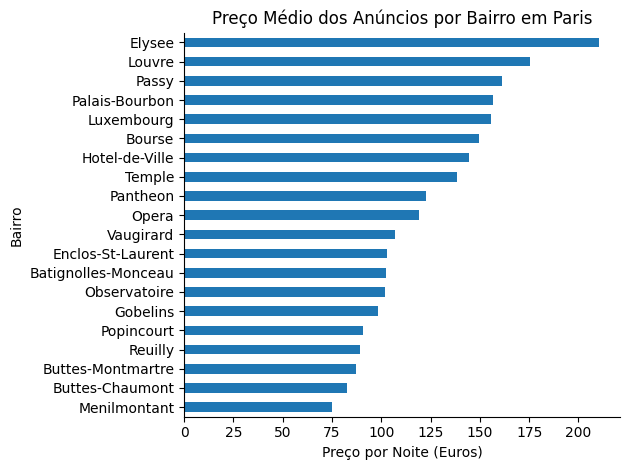

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define o tamanho da figura
plt.figure(figsize=(10, 8))

# Cria gráfico de barras horizontais com o preço médio por bairro
(paris_listings_neighbourhood
     .plot.barh(
         legend=None
     ))

# Adiciona título e rótulos
plt.title('Preço Médio dos Anúncios por Bairro em Paris')
plt.xlabel('Preço por Noite (Euros)')
plt.ylabel('Bairro')

# Remove bordas superiores e laterais para visual mais limpo
sns.despine()

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()


<Figure size 1000x600 with 0 Axes>

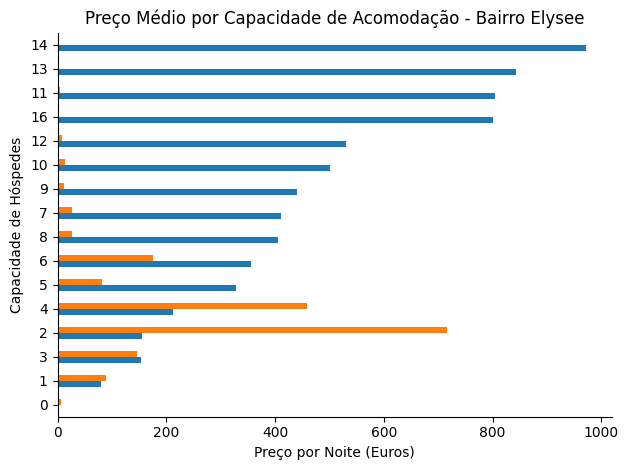

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define o tamanho da figura
plt.figure(figsize=(10, 6))

# Gráfico de barras horizontais mostrando o preço médio
# de acordo com a capacidade de acomodação
(paris_listing_accommodates
     .plot.barh(
         legend=None
     ))

# Título e rótulos 
plt.title('Preço Médio por Capacidade de Acomodação - Bairro Elysee')
plt.xlabel('Preço por Noite (Euros)')
plt.ylabel('Capacidade de Hóspedes')

# Remove bordas superiores e laterais
sns.despine()

# Ajusta o layout
plt.tight_layout()

# Exibe o gráfico
plt.show()


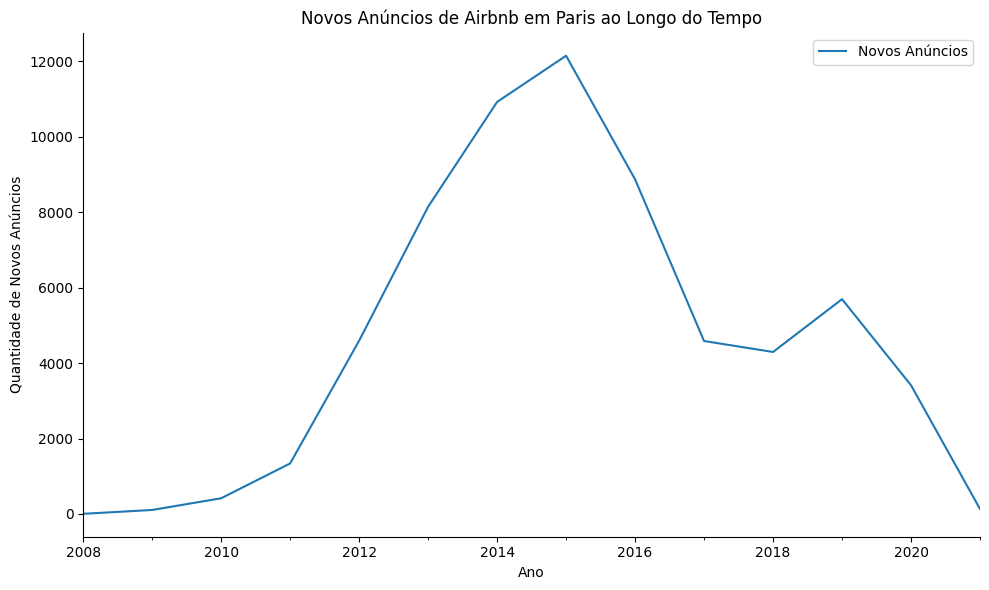

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot com rótulo para legenda
paris_listing_over_time['neighbourhood'].plot(
    label='Novos Anúncios'
)

# Título e rótulos
plt.title('Novos Anúncios de Airbnb em Paris ao Longo do Tempo')
plt.ylabel('Quantidade de Novos Anúncios')
plt.xlabel('Ano')

# Exibe legenda
plt.legend()

# Remove bordas superiores e laterais
sns.despine()

plt.tight_layout()
plt.show()


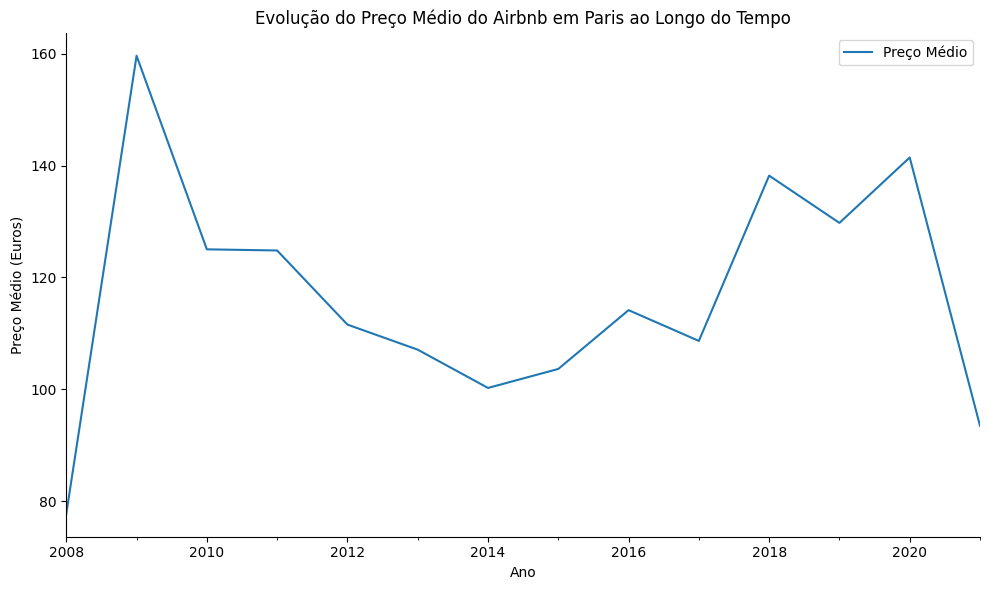

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot da evolução do preço médio ao longo do tempo
paris_listing_over_time['price'].plot(
    label='Preço Médio'
)

# Título e rótulos
plt.title('Evolução do Preço Médio do Airbnb em Paris ao Longo do Tempo')
plt.ylabel('Preço Médio (Euros)')
plt.xlabel('Ano')

# Exibe legenda
plt.legend()

# Remove bordas superiores e laterais
sns.despine()

plt.tight_layout()
plt.show()


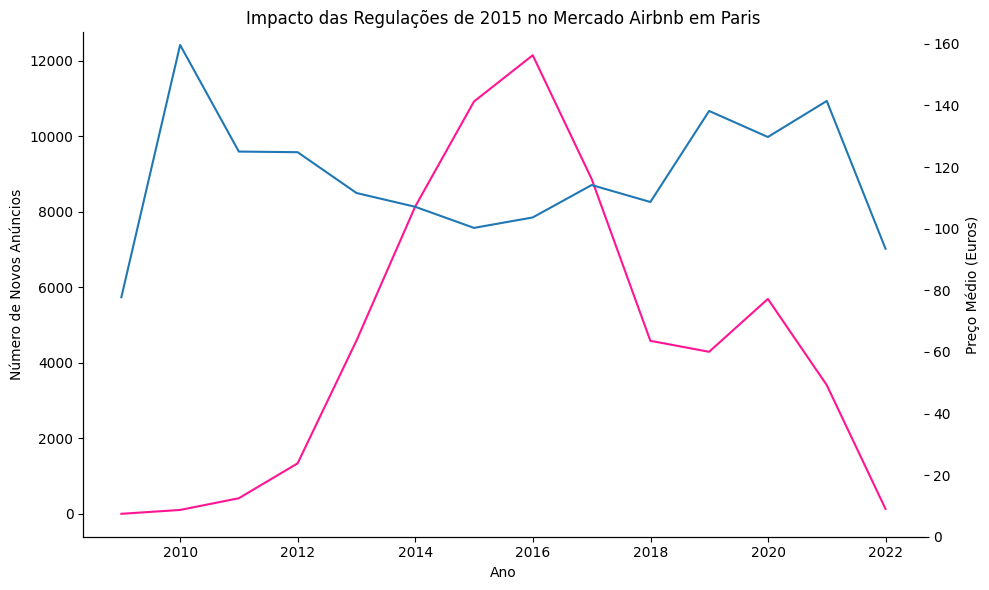

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))

# Linha 1 — Número de novos anúncios
ax.plot(
    paris_listing_over_time.index,
    paris_listing_over_time['neighbourhood'],
    label='Novos Anúncios',
    color='deeppink'
)

ax.set_ylabel('Número de Novos Anúncios')
ax.set_xlabel('Ano')

# Segundo eixo Y para preço médio
ax2 = ax.twinx()

ax2.plot(
    paris_listing_over_time.index,
    paris_listing_over_time['price'],
    label='Preço Médio'
)

ax2.set_ylabel('Preço Médio (Euros)')
ax2.set_ylim(bottom=0)

# Título corrigido
ax.set_title('Impacto das Regulações de 2015 no Mercado Airbnb em Paris')

# Remove bordas superiores
sns.despine()

# Ajusta layout
fig.tight_layout()

plt.show()
